In [145]:
#importer vos lib
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy as scipy
import seaborn as sns
from sklearn.model_selection import train_test_split
from datetime import datetime
import random

In [146]:
#imporot du dataset mushroom
data = pd.read_csv('./DATA/mushrooms.csv')

Définition des valeurs :

•classes: edible=e, poisonous=p

•cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

•cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

•cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

•bruises: bruises=t,no=f

•odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

•gill-attachment: attached=a,descending=d,free=f,notched=n

•gill-spacing: close=c,crowded=w,distant=d

•gill-size: broad=b,narrow=n

•gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

•stalk-shape: enlarging=e,tapering=t

•stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

•stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

•stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

•stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

•stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

•veil-type: partial=p,universal=u

•veil-color: brown=n,orange=o,white=w,yellow=y

•ring-number: none=n,one=o,two=t

•ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

•spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

•population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

•habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [147]:
# creation de date fictive pour l'authentification et remplacement valeur class
def generateDate():
    year = random.randint(1970, 2010) 
    month = random.randint(1, 12)
    day = random.randint(1, 28)
    return datetime(year,month,day)


data["class"]= data["class"].replace("p",1)
data["class"]=data["class"].replace("e",0)
dateTable = []
for i in data["class"]:
    dateTable.append(generateDate())
data.insert(1, "identify_at", dateTable)
data



,class,identify_at,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,1972-07-08,x,s,n,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
1,0,1982-08-05,x,s,y,t,a,f,c,b,...,s,w,w,p,w,o,p,n,n,g
2,0,1981-04-25,b,s,w,t,l,f,c,b,...,s,w,w,p,w,o,p,n,n,m
3,1,2008-02-12,x,y,w,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
4,0,1993-07-15,x,s,g,f,n,f,w,b,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,1971-03-06,k,s,n,f,n,a,c,b,...,s,o,o,p,o,o,p,b,c,l
8120,0,1979-11-15,x,s,n,f,n,a,c,b,...,s,o,o,p,n,o,p,b,v,l
8121,0,2002-10-25,f,s,n,f,n,a,c,b,...,s,o,o,p,o,o,p,b,c,l
8122,1,1998-08-08,k,y,n,f,y,f,c,n,...,k,w,w,p,w,o,e,w,v,l


In [148]:

data.shape

(8124, 24)

In [149]:
data.head()

,class,identify_at,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,1972-07-08,x,s,n,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
1,0,1982-08-05,x,s,y,t,a,f,c,b,...,s,w,w,p,w,o,p,n,n,g
2,0,1981-04-25,b,s,w,t,l,f,c,b,...,s,w,w,p,w,o,p,n,n,m
3,1,2008-02-12,x,y,w,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
4,0,1993-07-15,x,s,g,f,n,f,w,b,...,s,w,w,p,w,o,e,n,a,g


In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   class                     8124 non-null   int64         
 1   identify_at               8124 non-null   datetime64[ns]
 2   cap-shape                 8124 non-null   object        
 3   cap-surface               8124 non-null   object        
 4   cap-color                 8124 non-null   object        
 5   bruises                   8124 non-null   object        
 6   odor                      8124 non-null   object        
 7   gill-attachment           8124 non-null   object        
 8   gill-spacing              8124 non-null   object        
 9   gill-size                 8124 non-null   object        
 10  gill-color                8124 non-null   object        
 11  stalk-shape               8124 non-null   object        
 12  stalk-root          

<AxesSubplot:xlabel='class', ylabel='count'>

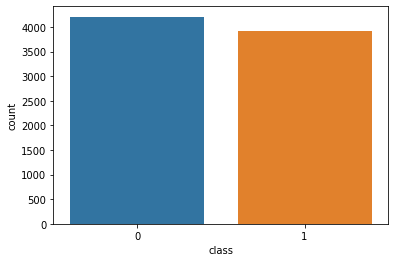

In [151]:

sns.countplot(x = 'class',data = data)

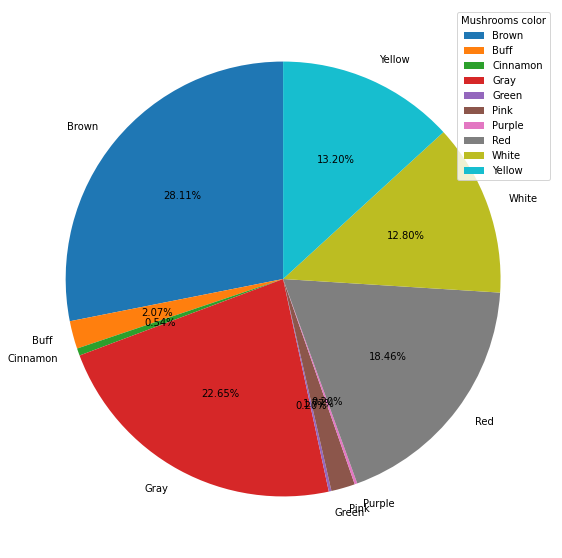

In [152]:
# Calcul des champignons commestibles ou toxiques
brunMushrooms = (data["cap-color"]== "n").sum()
buffMushrooms = (data["cap-color"]== "b").sum()
cinnamonMushrooms = (data["cap-color"]== "c").sum()
grayMushrooms = (data["cap-color"]== "g").sum()
greenMushrooms = (data["cap-color"]== "r").sum()
pinkMushrooms = (data["cap-color"]== "p").sum()
purpleMushrooms = (data["cap-color"]== "u").sum()
redMushrooms = (data["cap-color"]== "e").sum()
whiteMushrooms = (data["cap-color"]== "w").sum()
yellowMushrooms = (data["cap-color"]== "y").sum()
labels = ["Brown","Buff","Cinnamon","Gray","Green","Pink","Purple","Red","White","Yellow"]

plt.figure(figsize = (10,10))
plt.pie([brunMushrooms,
buffMushrooms,
cinnamonMushrooms, 
grayMushrooms,
greenMushrooms, 
pinkMushrooms, 
purpleMushrooms, 
redMushrooms, 
whiteMushrooms,
yellowMushrooms], labels =labels, startangle = 90,autopct = "%0.2f%%")

plt.legend(title = "Mushrooms color")
plt.show()

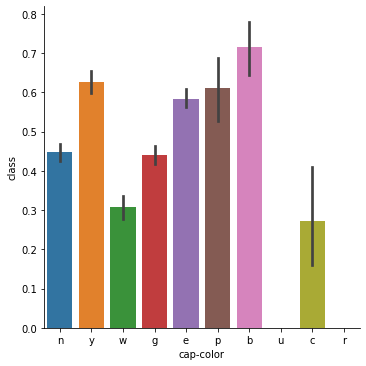

In [159]:
# rapprochement entre la coulaur et la toxisité 
sns.catplot(data=data, y='class', x="cap-color",kind="bar")